In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [55]:
df = pd.read_csv('synthetic.csv')

In [56]:
df = df.dropna()

In [57]:
df['Stock'] = df['Stock'].replace('In Stock', 1)
df['Stock'] = df['Stock'].replace('Out of Stock', 0)

C:\Users\abhay\AppData\Local\Temp\ipykernel_26288\2759892713.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [58]:
df = df.drop(columns = ['Category'], axis = 1)

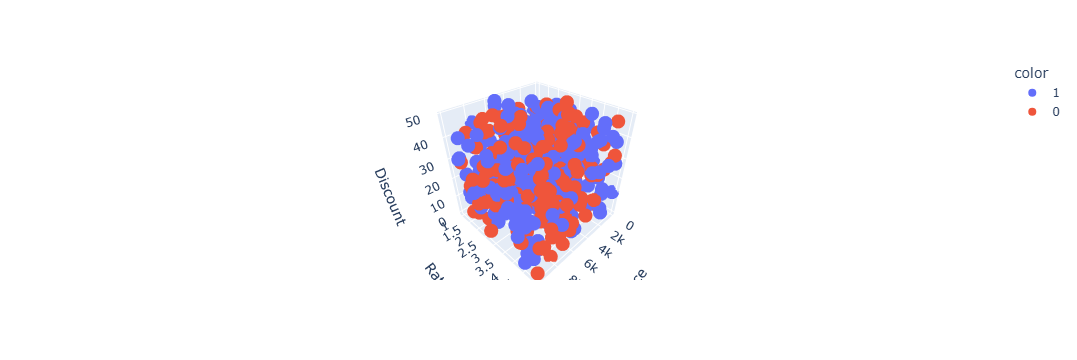

In [59]:
fig = px.scatter_3d(df, x = df['Price'], y = df['Rating'], z = df['Discount'], color = df['Stock'].astype('str'))
fig.show()

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [78]:
df_scaled = s.fit_transform(df.drop(columns = ['Stock'], axis = 1))

In [79]:
df_scaled = pd.DataFrame(df_scaled, columns = df.drop(columns = ['Stock'], axis = 1).columns) 

In [81]:
pca = PCA(n_components = 2)

In [82]:
df_trf = pca.fit_transform(df_scaled)

In [83]:
df_trf.shape

(540, 2)

In [84]:
df_trf = pd.DataFrame(df_trf, columns = ['PCA1', 'PCA2'])

In [85]:
df_trf.head(5)

,PCA1,PCA2
0,-0.323603,0.801771
1,1.023294,-1.957006
2,-1.295608,-0.940250
3,1.191268,0.457503
4,1.158021,1.112453


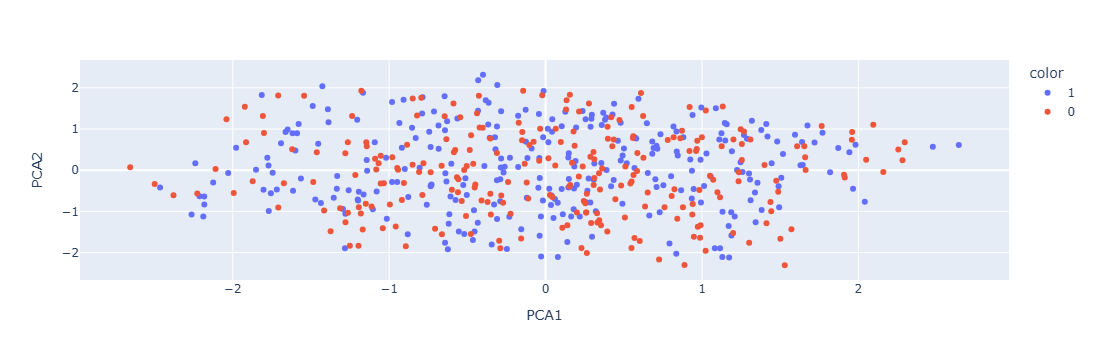

In [86]:
fig = px.scatter(df_trf, x = df_trf['PCA1'], y = df_trf['PCA2'], color = df['Stock'].astype('str'))
fig.show()